## **Visualizing Fire Scars Through False Color**
Author: Hylaea Miller

Date: 11/22/2025

Link to the repository: https://github.com/hylaea-miller/eds220-hwk4.git

## **About**
This notebook analyzes the 2025 Eaton and Palisades Fires in Los Angeles County using Landsat 8 satellite imagery. We manipulate spectral bands to create false-color composites that reveal fire scars and burned vegetation patterns across the landscape.

## **Purpose**
This analysis demonstrates how false-color composites enhance wildfire impact assessment. By strategically assigning spectral bands to RGB channels, we can identify burned areas and vegetation damage that remain difficult to detect in standard true-color imagery.

### **Highlights**
- Exploration of Geo-dataframes for Landsat and fire perimeter data.
- Restored geospatial information to the Landsat dataset using `rio.write_crs()`. 
- Created a false color composite using Landsat bands to highlight fire-affected areas.
- Overlaid fire perimeter data on the false color image to delineate affected areas.


### **Data**

**Landsat Collection of bands**

Contains simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosphericall corrected surface reflectance data, collected by the Landsat 8 satellite.

**Palisades and Eaton Dissolved Fire Perimeters**

Contains dissolved fire perimeters/boundaries for Eaton and Palisades fires.

### **References:**
Microsoft Planetary Computer. (2025). Landsat Collection 2 Level-2. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2.
[Accessed: November 19, 2025]

National Interagency Fire Center (NIFC). (2025). Palisades and Eaton 
Fire Perimeters [Dataset]. Los Angeles GeoHub. https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about 
[Accessed: November 19, 2025]‌

NASA Earth Observatory. (2014, March 14). Why is that Forest Red and that Cloud Blue? How to Interpret a False-Color Satellite Image. NASA Science. https://science.nasa.gov/earth/earth-observatory/how-to-interpret-a-false-color-satellite-image/
[Accessed: November 20, 2025]

## Import libraries

Import the necessary libraries for geospatial data handling, visualization, and analysis.

In [1]:
# Import libraries
import os              
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr   
import geopandas as gpd

## Import data

Load the Landsat band data and the fire perimeter data for both fires.

In [ ]:
# Load Landsat data from NetCDF file
landsat = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc")

# Load Eaton perimeter shapefile
fp = os.path.join('data', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp)

# Load Palisades perimeter shapefiles
fp = os.path.join('data', 'Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp)

## Fire perimeter data exploration

Explore the fire perimeter data for both fires to understand its structure and contents.

In [3]:
# Display the heads of the geo-dataframes
print(eaton.head())
print(palisades.head())

   OBJECTID            type    Shape__Are  Shape__Len  \
0         1  Heat Perimeter   2206.265625  270.199719   
1         2  Heat Perimeter  20710.207031  839.204218   
2         3  Heat Perimeter   3639.238281  250.304502   
3         4  Heat Perimeter   1464.550781  148.106792   
4         5  Heat Perimeter   4132.753906  247.960744   

                                            geometry  
0  POLYGON ((-13146936.686 4051222.067, -13146932...  
1  POLYGON ((-13150835.463 4052713.929, -13150831...  
2  POLYGON ((-13153094.697 4053057.596, -13153113...  
3  POLYGON ((-13145097.740 4053118.235, -13145100...  
4  POLYGON ((-13153131.126 4053196.882, -13153131...  
   OBJECTID            type    Shape__Are   Shape__Len  \
0         1  Heat Perimeter   1182.082031   267.101144   
1         2  Heat Perimeter   2222.488281   185.498783   
2         3  Heat Perimeter     21.011719    22.412814   
3         4  Heat Perimeter    214.992188    76.639180   
4         5  Heat Perimeter  44203.45

In [4]:
# Check the data type of each column
print(eaton.dtypes)
print(palisades.dtypes)

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [5]:
# Access the CRS of the eaton Geo-dataframe
eaton.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# Access the CRS of the palisades Geo-dataframe
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

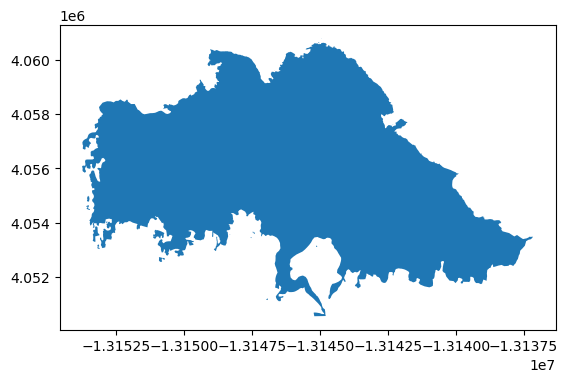

In [7]:
# Visualize Eaton fire extent 
eaton.plot()

<Axes: >

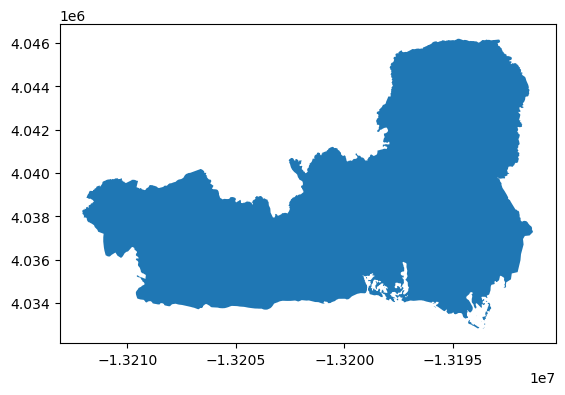

In [8]:
# Visualize Palisades fire extent 
palisades.plot()

### Description of the fire perimeter data

The fire perimeter datasets contain polygon boundaries for the Eaton and Palisades fires as of January 21, 2025. 

Attributes include:
- **OBJECTID**: Unique identifier for each polygon feature
- **type**: Classification (all features are "Heat Perimeter")
- **Shape__Are**: Area
- **Shape__Len**: Perimeter length
- **geometry**: Polygon geometries

The data uses EPSG:3857, a **projected** CRS

### Landsat data exploration

Explore the Landsat dataset to understand its structure, dimensions, and variables.

In [9]:
# Check the dataset head
landsat.head()

<xarray.Dataset> Size: 596B
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 40B 3.799e+06 3.799e+06 ... 3.799e+06 3.799e+06
  * x            (x) float64 40B 3.344e+05 3.344e+05 ... 3.345e+05 3.345e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 100B ...
    green        (y, x) float32 100B ...
    blue         (y, x) float32 100B ...
    nir08        (y, x) float32 100B ...
    swir22       (y, x) float32 100B ...
    spatial_ref  int64 8B ...

In [10]:
# Check the dataset info
landsat.info()

xarray.Dataset {
dimensions:
	y = 1418 ;
	x = 2742 ;

variables:
	float64 y(y) ;
		y:units = metre ;
		y:resolution = -30.0 ;
		y:crs = EPSG:32611 ;
		y:axis = Y ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
	float64 x(x) ;
		x:units = metre ;
		x:resolution = 30.0 ;
		x:crs = EPSG:32611 ;
		x:axis = X ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
	datetime64[ns] time() ;
	float32 red(y, x) ;
		red:grid_mapping = spatial_ref ;
	float32 green(y, x) ;
		green:grid_mapping = spatial_ref ;
	float32 blue(y, x) ;
		blue:grid_mapping = spatial_ref ;
	float32 nir08(y, x) ;
		nir08:grid_mapping = spatial_ref ;
	float32 swir22(y, x) ;
		swir22:grid_mapping = spatial_ref ;
	int64 spatial_ref() ;
		spatial_ref:crs_wkt = PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["

### Description of Lansat NetCDF data

The Landsat NetCDF data contains multiple spectral bands captured by the Landsat 8 satellite. The dataset includes the following information:

- **Variables**: red, green, blue, nir08, swir33, spatial_ref

**Dimensions**:
- **y**: 1418 pixels
- **x**: 2742 pixels	

- **Coordinates**:

(CRS) EPSG:32611

(y) array([3799050., 3799020., 3798990., 3798960., 3798930.])

(x) array([334410., 334440., 334470., 334500., 334530.])

- **units**: metre

### Restoring geospatial information

Use `rio.crs` to print what is the CRS of this dataset. Is this a geospatial object?


In [11]:
# Access the CRS using rio.crs
print(landsat.rio.crs)

None


We see that the dataset does not have a CRS assigned, indicating it is not currently a geospatial object. To restore the geospatial information, we will use the `rio.write_crs()` function to assign the correct CRS to the dataset.

Print the CRS by accesing the `spatial_ref.crs_wkt` attribute of the dataset.

In [12]:
# Access the CRS in WKT format
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

Recover the geospatial information by using `rio.write_crs()` and the spatial reference information form the `spatial_ref.crs_wkt` attribute.

In [13]:
# Write the correct CRS
landsat.rio.write_crs("WGS 84 / UTM zone 11N", inplace=True)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int32 4B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

Print the CRS of the updated dataset.

In [14]:
# Verify the CRS
print(landsat.rio.crs)

EPSG:32611


### True color image

Without creating any new variables:

- Select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data
- Convert it to a numpy.array using the to_array() method
- Use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\hylae\.conda\envs\eds220-env\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


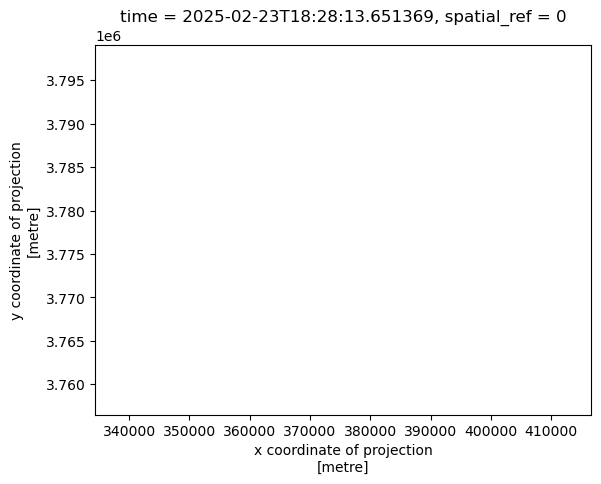

In [15]:
# Selecyt red, green, blue bands, convert to array, and plot
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

To resolve the other warning, identify which bands have nan values. 

In [16]:
# Check for missing data in red, green, and blue bands
print(np.isnan(landsat[["red", "green","blue"]]).sum())

<xarray.Dataset> Size: 24B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B ...
    spatial_ref  int32 4B 0
Data variables:
    red          int32 4B 0
    green        int32 4B 1
    blue         int32 4B 109


Use the `.fillna()` mehtod for xarray.Datasets to substitute the any nan values in the Landsat data for zero.

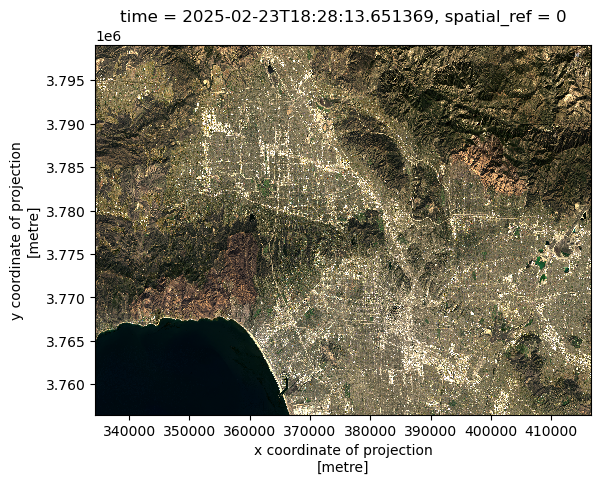

In [17]:
# Create a new true color image that gets plotted without warnings.
landsat[['red', 'green', 'blue']].to_array().fillna(0).plot.imshow(robust = True)

**Brief explanation comparing the plot ouputs of the two true color images (with and without nan values, and without robust = Ture).**

The first output image shows a blank canvas with no visible features, while the second output image displays a true-color representation of the area. The robust=True parameter adjusts the color scaling, preventing outliers from dominating and allowing the image to display correctly, while filling NaN values with zero prevents gaps in the data and warning messages.

### 6. False color image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

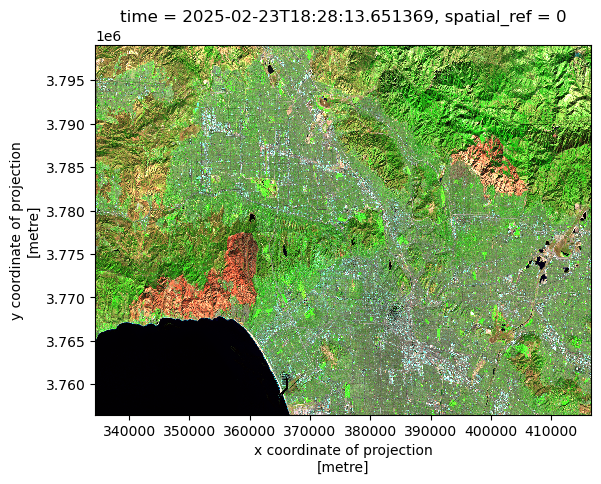

In [18]:
# Plot a false color image using SWIR, NIR, and Red bands
landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow(robust = True)

## 7. Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. 

Reproject the fire perimeter data to match the CRS of the Landsat data before plotting.

In [19]:
# Reproject the fire extends to the landsat dataset
eaton = eaton.to_crs(landsat.rio.crs)
palisades = palisades.to_crs(landsat.rio.crs)

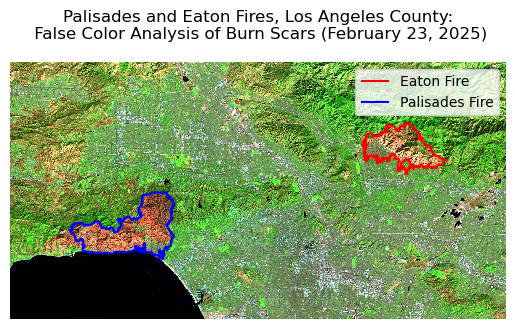

In [23]:
# Plot false color image with fire perimeters
fig, ax = plt.subplots()
landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow(ax=ax, robust=True)
eaton.boundary.plot(ax=ax, edgecolor='red', label='Eaton Fire')
palisades.boundary.plot(ax=ax, edgecolor='blue', label='Palisades Fire')
ax.set_title('Palisades and Eaton Fires, Los Angeles County:\n False Color Analysis of Burn Scars (February 23, 2025)')
ax.legend()
ax.axis('off')
plt.show()

**Write a figure description for the map including a brief explanation of how false color imagery is being used.**

This figure displays a false color composite image of the Los Angeles County fires using SWIR, NIR, and red bands assigned to RGB channels, respectively, to highlight the burned areas from the Palisades and Eaton fires. The imagery was acquired by Landsat 8 on February 23, 2025.

Healthy vegetation appears in shades of bright green due to high reflectance in the near-infrared band, while burned areas are shown in shades of brown and magenta, indicating low reflectance in both the shortwave infrared and near-infrared bands. Fire perimeters are overlaid on the image, with the Palisades Fire outlined in blue and the Eaton Fire outlined in red, allowing for easy identification of the affected areas.